In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
!pip install sumy

In [ ]:
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = """
The Earth's climate has undergone significant changes over the past century. Scientific evidence indicates that human activities, particularly the emission of greenhouse gases like carbon dioxide and methane, are the primary drivers of recent global warming. The burning of fossil fuels for energy, deforestation, and various industrial processes release these gases into the atmosphere, where they trap heat and raise global temperatures.

As a result, we are witnessing a range of environmental impacts. Glaciers and polar ice caps are melting at an accelerated rate, contributing to rising sea levels. This poses a threat to coastal communities and low-lying islands, increasing the risk of flooding and habitat loss. Additionally, changing climate patterns are affecting biodiversity, with many species struggling to adapt to new conditions. This leads to shifts in ecosystems and can result in the extinction of vulnerable species.

Extreme weather events, such as hurricanes, droughts, and heatwaves, are becoming more frequent and severe. These events cause significant economic damage, disrupt food production, and jeopardize water resources. For instance, prolonged droughts can lead to crop failures, impacting food security and causing price hikes. Similarly, intense heatwaves can strain power grids and increase the incidence of heat-related illnesses.

Mitigating climate change requires concerted global efforts. Nations must work together to reduce greenhouse gas emissions by transitioning to renewable energy sources, improving energy efficiency, and protecting forests. International agreements, like the Paris Agreement, aim to unite countries in the fight against climate change by setting targets for emission reductions and promoting sustainable practices.

Public awareness and individual actions also play crucial roles in addressing climate change. People can reduce their carbon footprint by adopting eco-friendly habits such as using public transportation, conserving energy, and supporting sustainable products. Education and advocacy are essential to drive the political and societal changes needed to combat this pressing issue.

In conclusion, climate change is a critical global challenge that necessitates immediate and sustained action from governments, businesses, and individuals. By working together, we can mitigate the adverse effects of climate change and ensure a healthier planet for future generations.
"""

In [ ]:
sentence_list = text.split('.')

In [ ]:
modified_list = []

In [ ]:
for sentence in sentence_list:
   new_text = sentence.replace('\n', '')
   modified_list.append(new_text)

In [ ]:
modified_list

["The Earth's climate has undergone significant changes over the past century",
 ' Scientific evidence indicates that human activities, particularly the emission of greenhouse gases like carbon dioxide and methane, are the primary drivers of recent global warming',
 ' The burning of fossil fuels for energy, deforestation, and various industrial processes release these gases into the atmosphere, where they trap heat and raise global temperatures',
 'As a result, we are witnessing a range of environmental impacts',
 ' Glaciers and polar ice caps are melting at an accelerated rate, contributing to rising sea levels',
 ' This poses a threat to coastal communities and low-lying islands, increasing the risk of flooding and habitat loss',
 ' Additionally, changing climate patterns are affecting biodiversity, with many species struggling to adapt to new conditions',
 ' This leads to shifts in ecosystems and can result in the extinction of vulnerable species',
 'Extreme weather events, such as 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_sentence_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

embeddings = np.array([get_sentence_embedding(sentence) for sentence in modified_list])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
embeddings

array([[-0.3742817 , -0.04022871, -0.01282412, ..., -0.5363975 ,
         0.2170462 ,  0.5836266 ],
       [-0.39593077,  0.3230675 ,  0.06964515, ..., -0.48339966,
         0.47993484,  0.250702  ],
       [ 0.02987724,  0.5706899 ,  0.00846155, ..., -0.31087846,
         0.2653563 , -0.08388422],
       ...,
       [-0.4653927 , -0.10309802, -0.4335803 , ..., -0.46177137,
         0.2907852 ,  0.207403  ],
       [ 0.02649233, -0.11903636, -0.25332385, ..., -0.6837324 ,
         0.4934349 , -0.08852737],
       [-1.0533974 , -0.41769162, -0.3749478 , ..., -0.3730958 ,
        -0.38231525,  0.33689433]], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

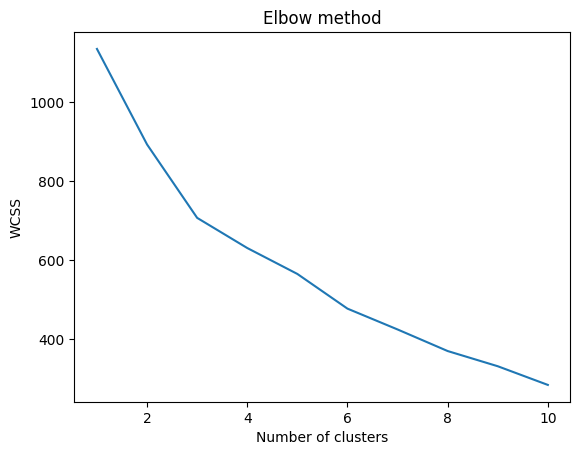

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(embeddings)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#No of optimal clusters == 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1],
      dtype=int32)

In [ ]:
dict_embeddings = {}

for i in range(len(modified_list)):
  if i not in dict_embeddings:
     dict_embeddings[i] = y_kmeans[i]

In [ ]:
dict_embeddings

In [ ]:
#No of groups = 3

sentence_list_1 = []
sentence_list_2 = []
sentence_list_3 = []

for key in dict_embeddings:
  if dict_embeddings[key] == 0:
    sentence_list_1.append(modified_list[key])
  elif dict_embeddings[key] == 1:
    sentence_list_2.append(modified_list[key])
  else:
    sentence_list_3.append(modified_list[key])

In [ ]:
sentence_list_1

["The Earth's climate has undergone significant changes over the past century",
 'As a result, we are witnessing a range of environmental impacts',
 ' This poses a threat to coastal communities and low-lying islands, increasing the risk of flooding and habitat loss',
 ' This leads to shifts in ecosystems and can result in the extinction of vulnerable species',
 ' These events cause significant economic damage, disrupt food production, and jeopardize water resources',
 'Mitigating climate change requires concerted global efforts',
 ' Nations must work together to reduce greenhouse gas emissions by transitioning to renewable energy sources, improving energy efficiency, and protecting forests',
 'Public awareness and individual actions also play crucial roles in addressing climate change',
 ' Education and advocacy are essential to drive the political and societal changes needed to combat this pressing issue',
 'In conclusion, climate change is a critical global challenge that necessitate

In [ ]:
sentence_list_2

['']

In [ ]:
sentence_list_3

[' Scientific evidence indicates that human activities, particularly the emission of greenhouse gases like carbon dioxide and methane, are the primary drivers of recent global warming',
 ' The burning of fossil fuels for energy, deforestation, and various industrial processes release these gases into the atmosphere, where they trap heat and raise global temperatures',
 ' Glaciers and polar ice caps are melting at an accelerated rate, contributing to rising sea levels',
 ' Additionally, changing climate patterns are affecting biodiversity, with many species struggling to adapt to new conditions',
 'Extreme weather events, such as hurricanes, droughts, and heatwaves, are becoming more frequent and severe',
 ' For instance, prolonged droughts can lead to crop failures, impacting food security and causing price hikes',
 ' Similarly, intense heatwaves can strain power grids and increase the incidence of heat-related illnesses',
 ' International agreements, like the Paris Agreement, aim to u

In [ ]:
parser = PlaintextParser.from_string(text, Tokenizer("english"))
summarizer = LexRankSummarizer()

temp_summary = summarizer(parser.document, 50) #Summarize the document with 100 sentences

In [ ]:
summary_sentences = [sentence._text for sentence in temp_summary]

reference_summary = ' '.join(summary_sentences)

print(reference_summary)

The Earth's climate has undergone significant changes over the past century. Scientific evidence indicates that human activities, particularly the emission of greenhouse gases like carbon dioxide and methane, are the primary drivers of recent global warming. The burning of fossil fuels for energy, deforestation, and various industrial processes release these gases into the atmosphere, where they trap heat and raise global temperatures. As a result, we are witnessing a range of environmental impacts. Glaciers and polar ice caps are melting at an accelerated rate, contributing to rising sea levels. This poses a threat to coastal communities and low-lying islands, increasing the risk of flooding and habitat loss. Additionally, changing climate patterns are affecting biodiversity, with many species struggling to adapt to new conditions. This leads to shifts in ecosystems and can result in the extinction of vulnerable species. Extreme weather events, such as hurricanes, droughts, and heatwa

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge


rouge = Rouge()


set_of_summaries = [sentence_list_1, sentence_list_3]

for summary in set_of_summaries:
  generated_summary = '.'.join(summary)
  scores = rouge.get_scores(generated_summary, reference_summary)
  print(scores)

[{'rouge-1': {'r': 0.5102880658436214, 'p': 1.0, 'f': 0.6757493143267825}, 'rouge-2': {'r': 0.46567164179104475, 'p': 0.9570552147239264, 'f': 0.6265060196928276}, 'rouge-l': {'r': 0.5102880658436214, 'p': 1.0, 'f': 0.6757493143267825}}]
[{'rouge-1': {'r': 0.5637860082304527, 'p': 1.0, 'f': 0.7210526269680055}, 'rouge-2': {'r': 0.49850746268656715, 'p': 0.9653179190751445, 'f': 0.6574803104691085}, 'rouge-l': {'r': 0.5637860082304527, 'p': 1.0, 'f': 0.7210526269680055}}]
